# Exploratory data analysis(Customer Churn)

In [3]:
# imports for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [5]:
# load the data set
df= pd.read_csv("C:\\exploratory data analysis\\datasets\\CustomerChurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# check the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# get the statsistical information about the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


<Axes: xlabel='Churn'>

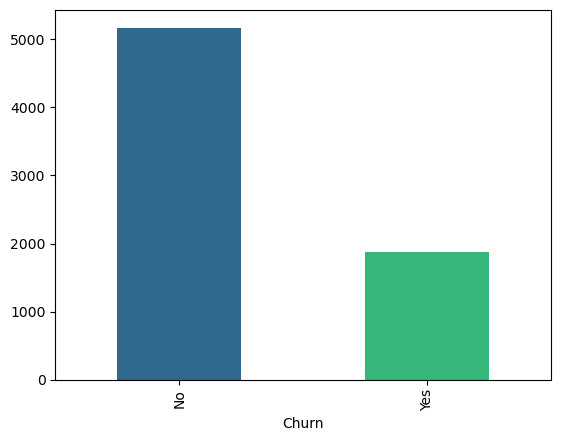

In [8]:
color_scheme= sns.color_palette("viridis", n_colors= len(df["Churn"].unique()))
df["Churn"].value_counts().plot(kind= "bar",color= color_scheme)

In [11]:
# check the percentage distribution 
round(df["Churn"].value_counts()/len(df["Churn"]) * 100,2)

Churn
No     73.46
Yes    26.54
Name: count, dtype: float64

In [14]:
# visualize the percentage of missing data for each columns
missing_data= pd.DataFrame((df.isnull().sum()) / len(df) * 100,index= df.columns)
missing_data

,0
customerID,0.0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0
OnlineSecurity,0.0


<Axes: >

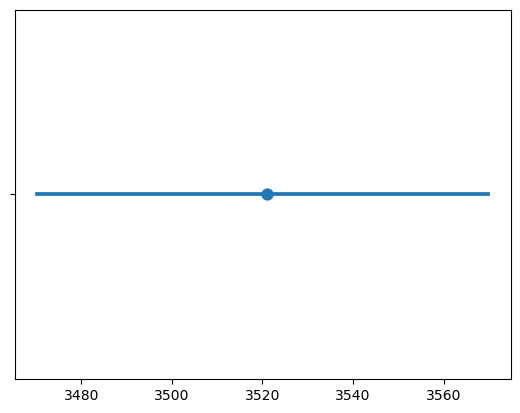

In [22]:
# visualise the above dataframe
sns.pointplot(missing_data,x= df.index)

In [42]:
# plot null values
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0],index= df.columns)

In [45]:
missing.rename(columns= {0:"rate"},inplace= True)

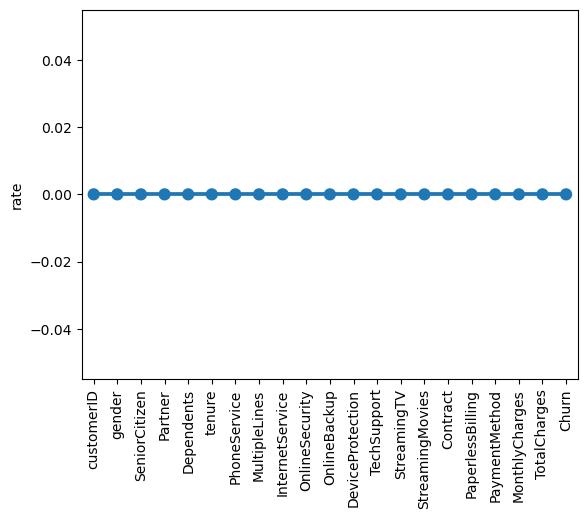

In [50]:
plt.figure()
sns.pointplot(missing,y= missing.rate,x= missing.index)
plt.xticks(rotation= 90);

# data cleaning

In [51]:
# create a copy of the original data
telecom_df= df.copy()

In [54]:
# convert the total charges to numerical category
telecom_df["TotalCharges"]= pd.to_numeric(telecom_df.TotalCharges,errors= "coerce")

In [56]:
telecom_df.TotalCharges.isnull().sum()

11

In [62]:
# drop the missing observations
telecom_df.drop(telecom_df.loc[telecom_df.TotalCharges.isnull() == True].index,axis= "rows",inplace= True)

In [63]:
# removing remianing null values as well
telecom_df.dropna(axis= 0,inplace= True,how= "any")

In [64]:
df= telecom_df.copy()

C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tenure', ylabel='Density'>

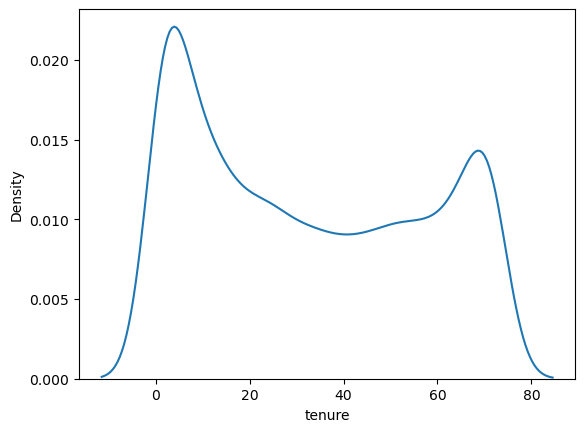

In [77]:
plt.figure()
sns.kdeplot(data= df.tenure)

In [78]:
# remove columns not required for data analysis
df.drop(columns= ["customerID","tenure"],axis= 1,inplace= True)

# data exploration

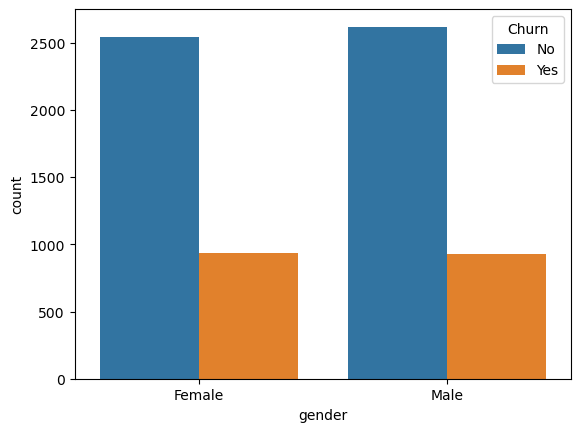

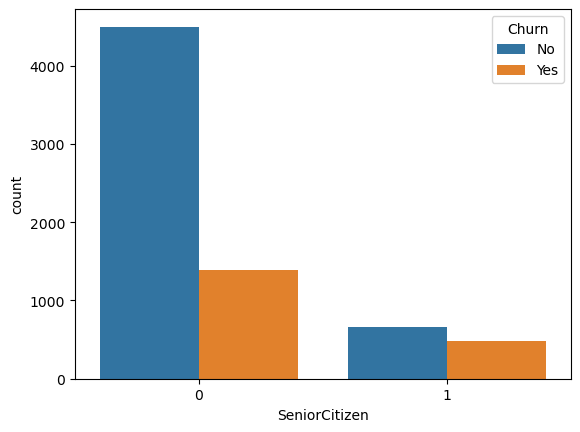

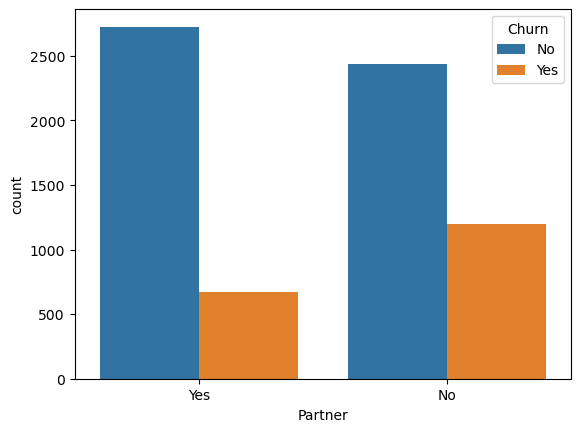

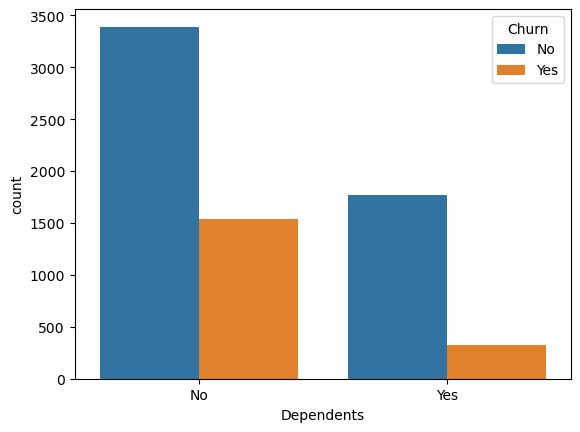

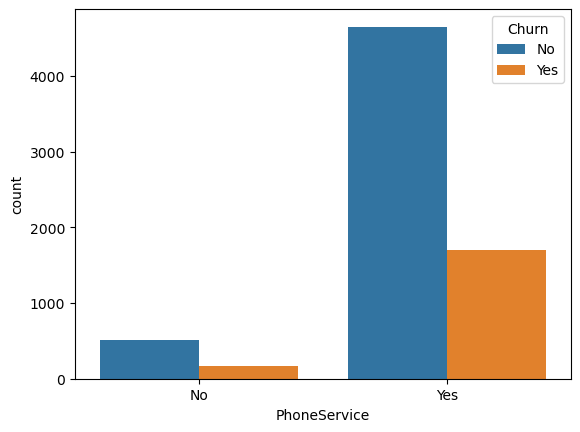

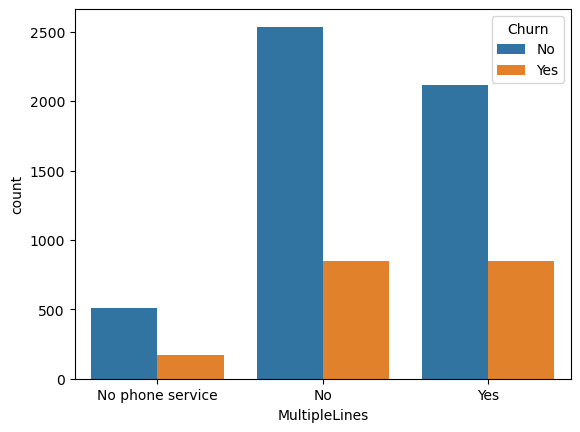

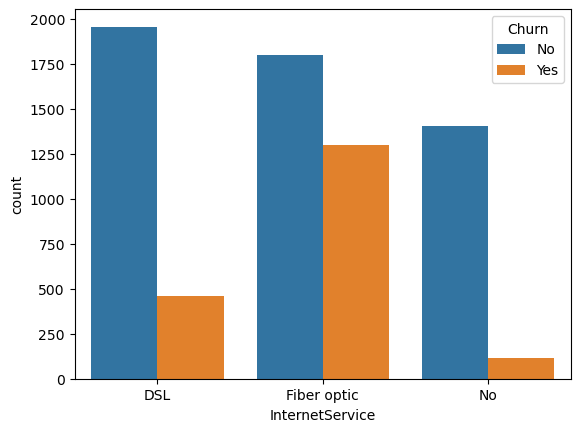

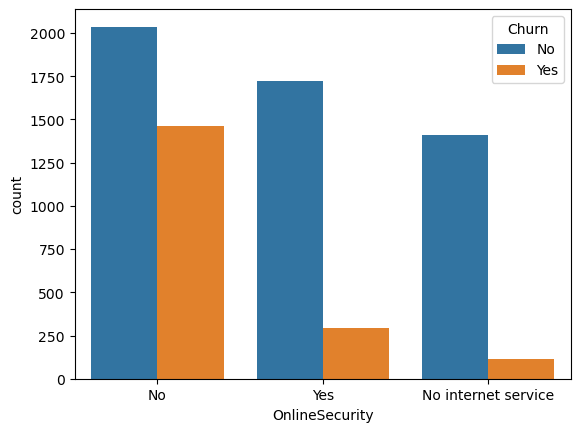

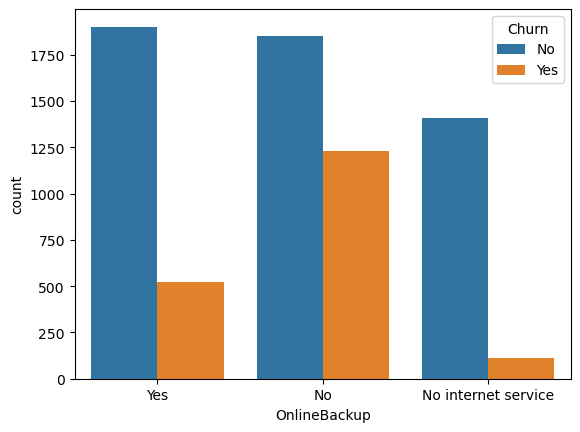

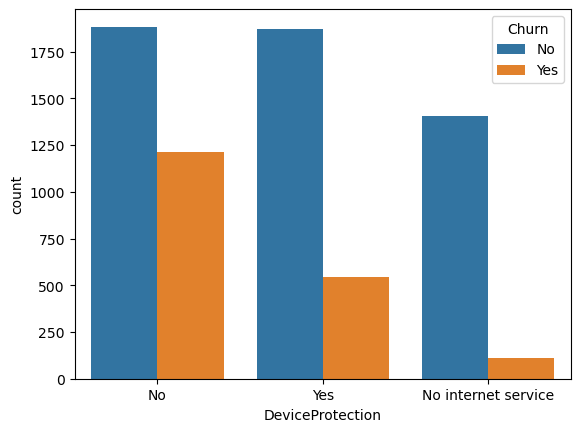

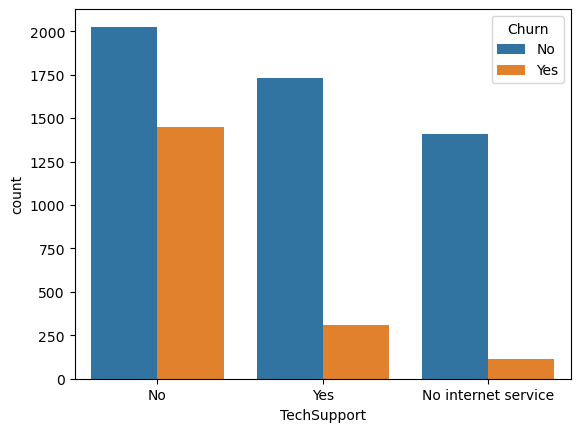

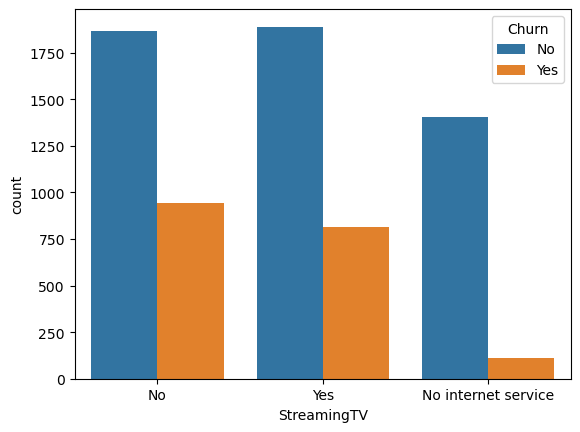

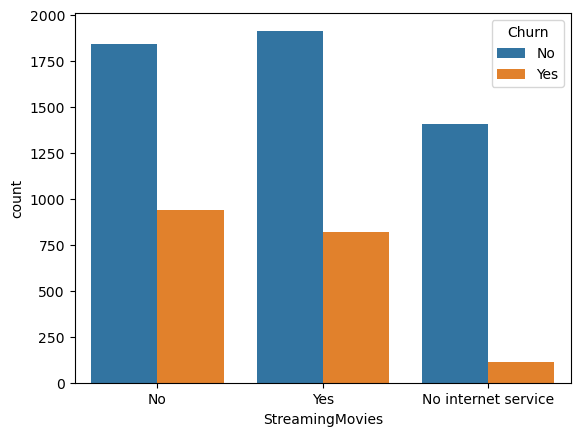

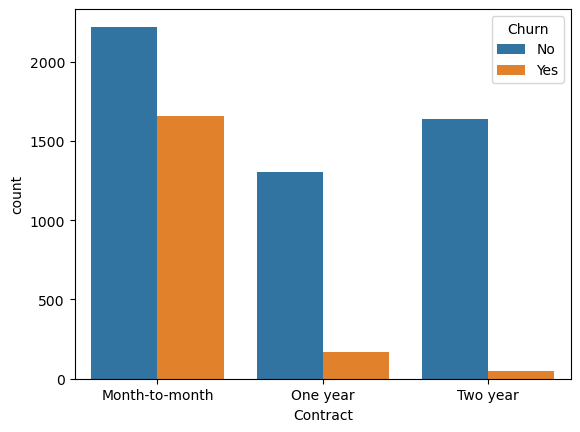

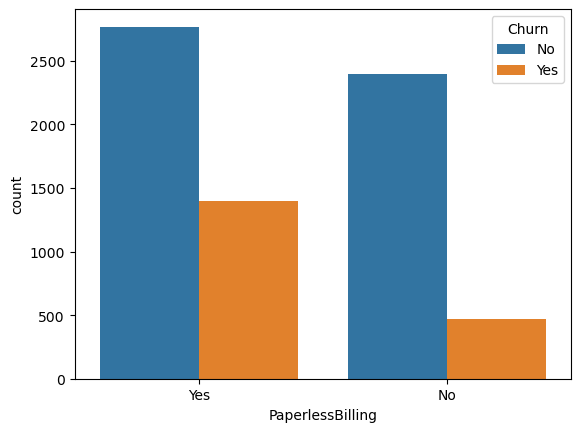

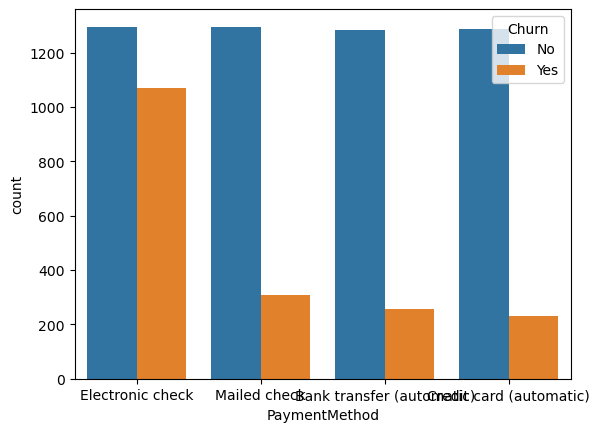

In [109]:
for i,feature in enumerate(df.drop(["Churn","TotalCharges","MonthlyCharges"],axis= 1)):
    plt.figure(i)
    sns.countplot(df,x= feature,hue= "Churn")

In [112]:
df.Churn= df.Churn.map({"No":0,
              "Yes":1})

In [114]:
categorical_feature= [feature for feature in df.select_dtypes(include= ["O"])]

In [117]:
df_dummies= pd.get_dummies(data= df,columns= categorical_feature,dtype= "int",drop_first= True)

In [118]:
df_dummies.shape

(7032, 30)

In [120]:
# churn by monthly charges
month_charges_not_churned= df_dummies.MonthlyCharges[df.Churn == 0]
month_charges_churned= df_dummies.MonthlyCharges[df.Churn == 1]

C:\Users\WINDOWS 11-23H2\AppData\Local\Temp\ipykernel_22804\2385308565.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(month_charges_not_churned,color= "red",shade= True)
C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WINDOWS 11-23H2\AppData\Local\Temp\ipykernel_22804\2385308565.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(month_charges_churned,color= "blue",shade= True)
C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated 

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

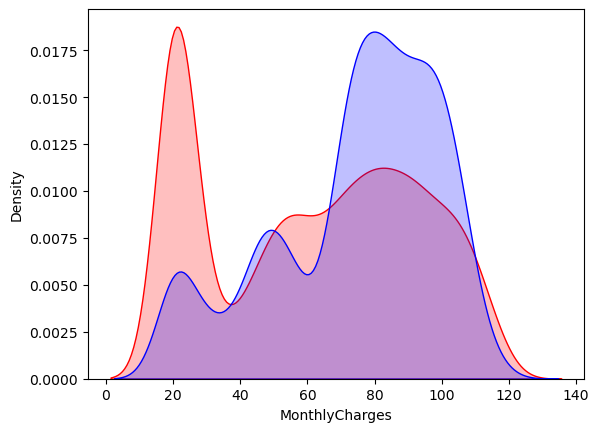

In [126]:

sns.kdeplot(month_charges_not_churned,color= "red",shade= True)
sns.kdeplot(month_charges_churned,color= "blue",shade= True)

<Axes: >

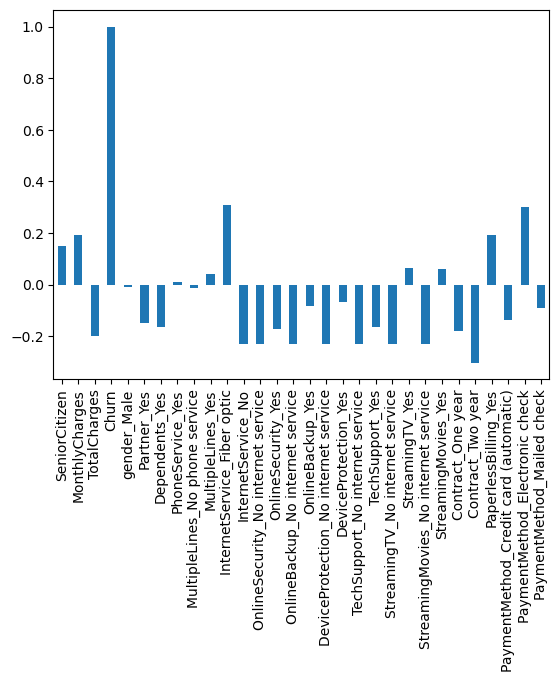

In [129]:
# find the correlation btw label and features
df_dummies.corr()["Churn"].plot(kind= "bar")

<Axes: >

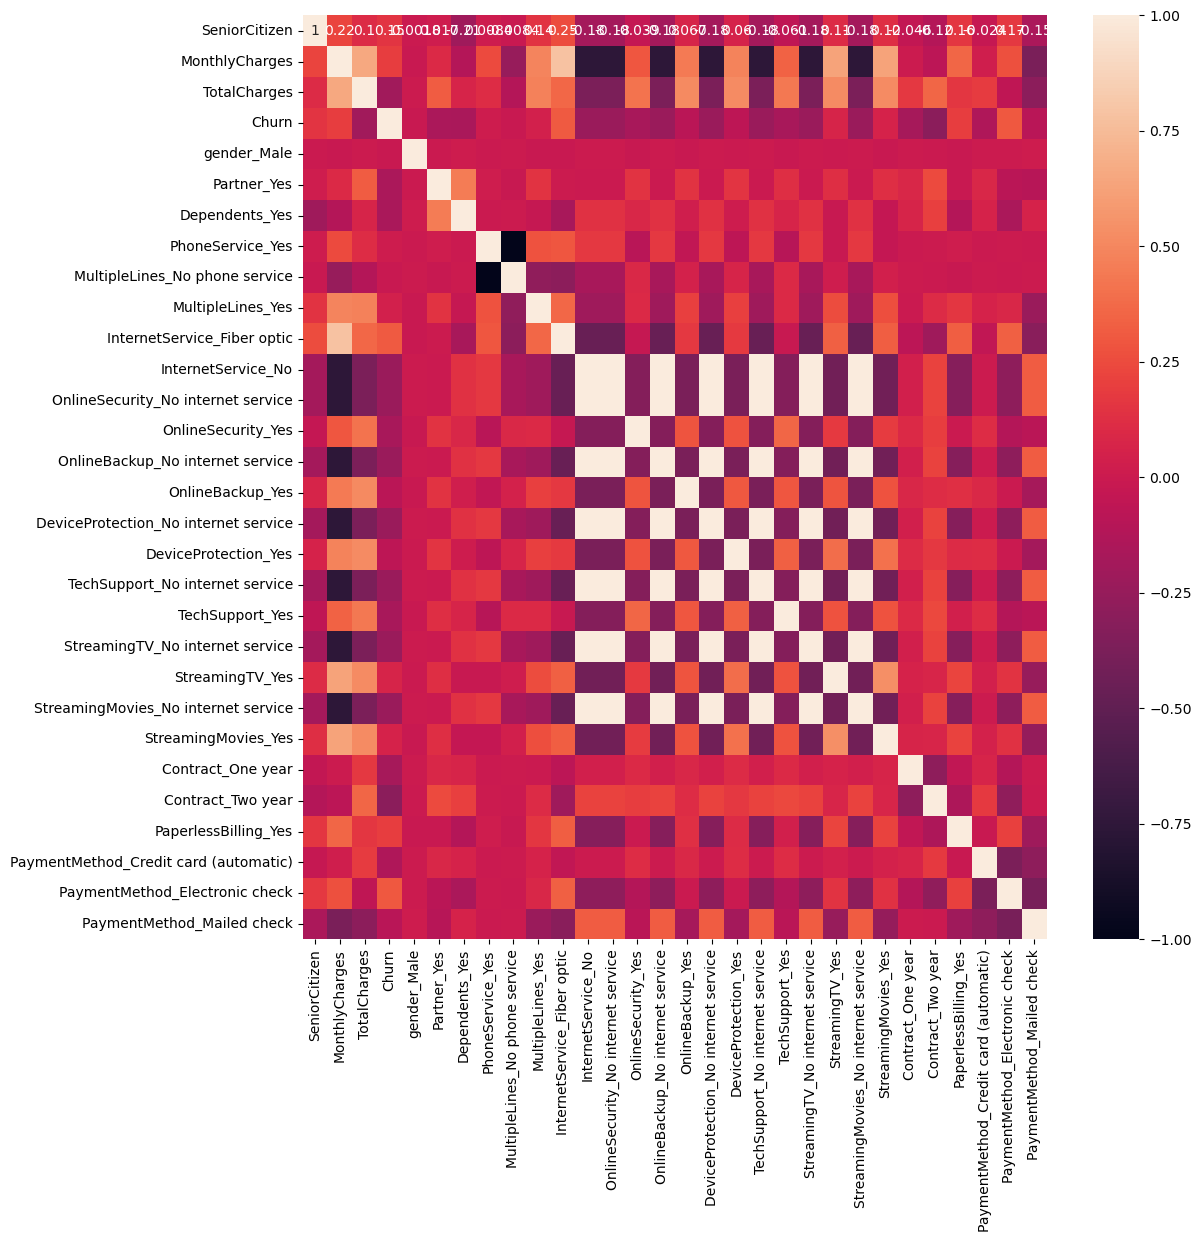

In [131]:
# draw a correlation heatmap
plt.figure(figsize= (12,12))
sns.heatmap(df_dummies.corr(),annot= True)


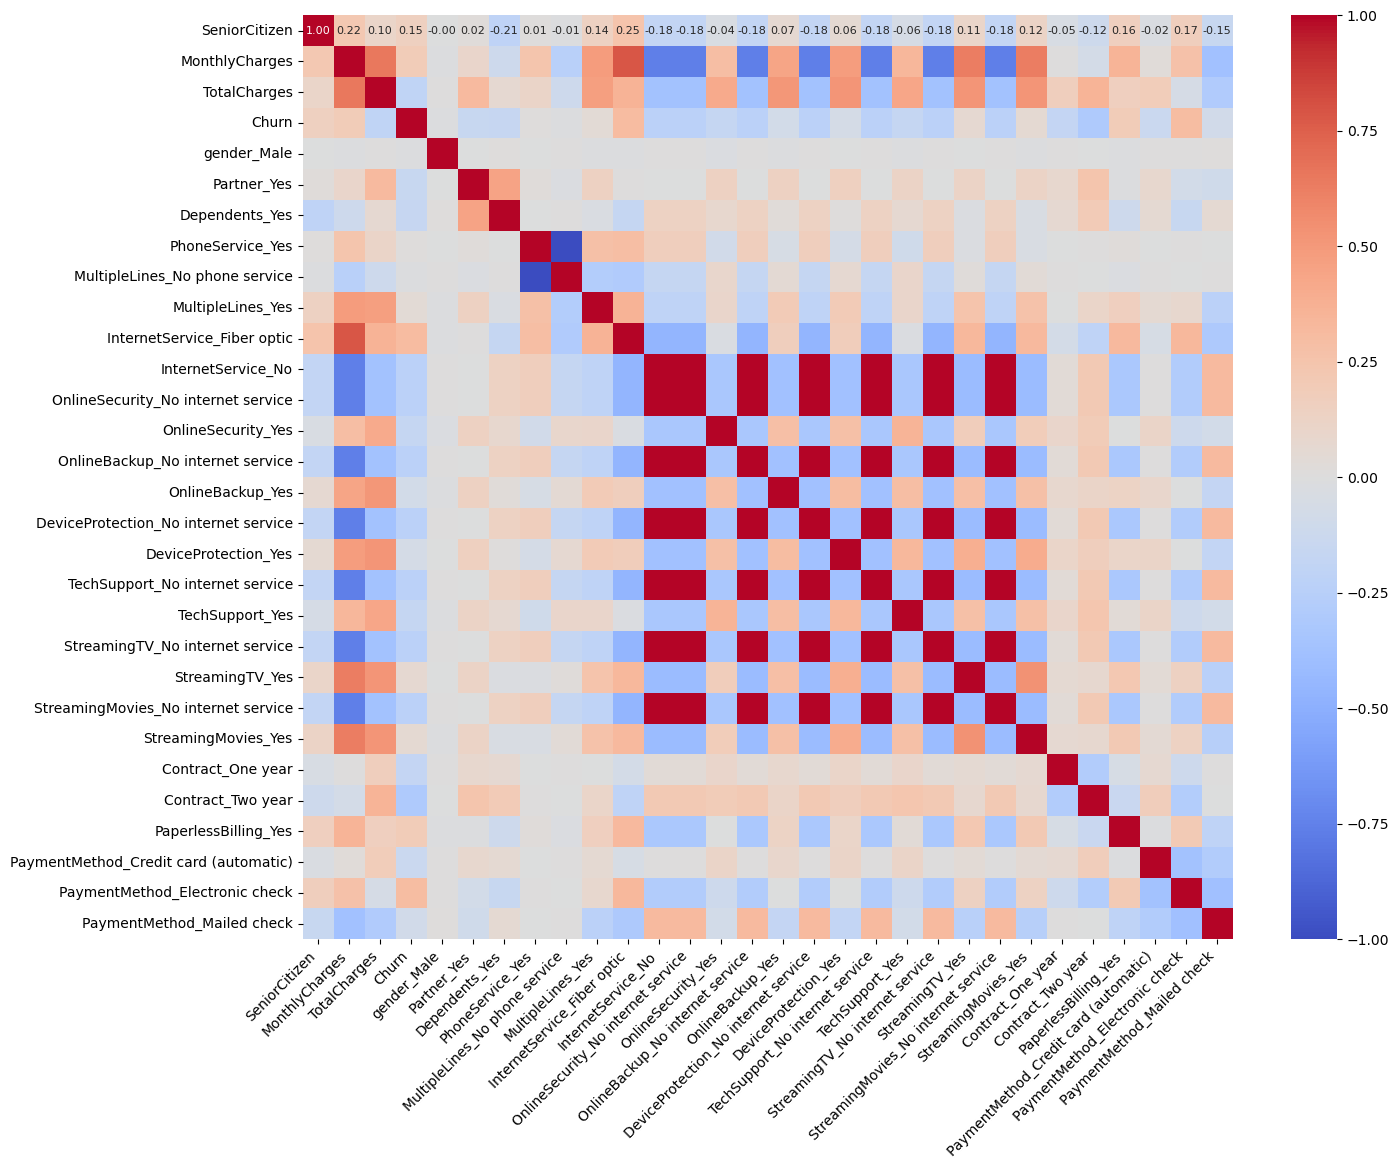

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12)) 
sns.heatmap(df_dummies.corr(), cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

